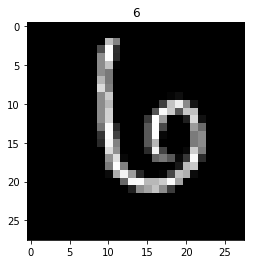

In [4]:
#-*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline
# from IPython import get_ipython
# get_ipython().run_line_magic('matplotlib', 'inline')

labeled_images = pd.read_csv('train.csv')
#取前5000条数据（为了节省时间，只取小部分数据进行测试）
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
#划分测试集与验证集
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)


#取第一张图片
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
#打印第一张图片及其统计信息
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])



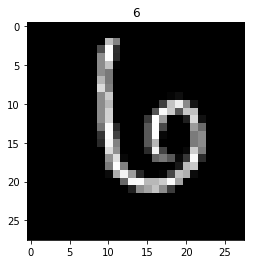

In [5]:
#取第一张图片
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
#打印第一张图片及其统计信息
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([ 682.,    9.,   10.,    7.,   10.,   18.,    7.,   17.,    7.,   17.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

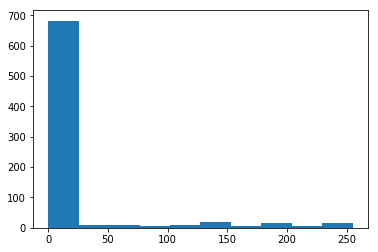

In [6]:
#打印第一张图片的像素统计信息
plt.hist(train_images.iloc[i])

In [8]:
#测试sklearn.svm的分类效果（注意这里的数据是256色灰度图）
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
score = clf.score(test_images,test_labels)
print(score)

0.1


/Users/abc/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/abc/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/abc/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#in

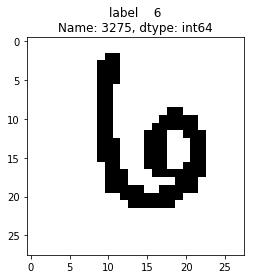

In [9]:
#将灰度图转化为二值图（只有0和1两种像素值）
test_images[test_images>0]=1
train_images[train_images>0]=1
#显示第一张图片
img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

(array([ 668.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  116.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

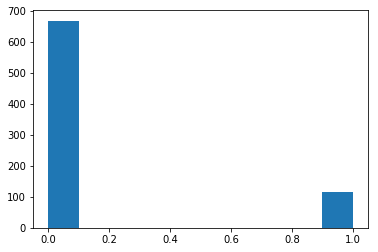

In [10]:
#显示第一张图片的像素统计信息
plt.hist(train_images.iloc[i])

In [11]:
#测试sklearn.svm的效果（二值图）
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
score = clf.score(test_images,test_labels)
print(score)

0.887


In [12]:
#读入测试数据
test_data=pd.read_csv('test.csv')
test_data[test_data>0]=1
#预测
results=clf.predict(test_data[0:5000])
print(results)

[2 0 9 ..., 1 7 3]


In [13]:
#按规定格式保存预测结果
df = pd.DataFrame({"ImageId": list(range(1,len(results)+1)),"Label": results})
df.to_csv('prediction.csv',index=False, header=True)